# SCIPY

## 0. lépés - adatok betöltése

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

In [2]:
data = pd.read_csv('data.csv', delimiter=';', header=None, names=['x','y'], dtype={'x':np.float64, 'y':np.float64})

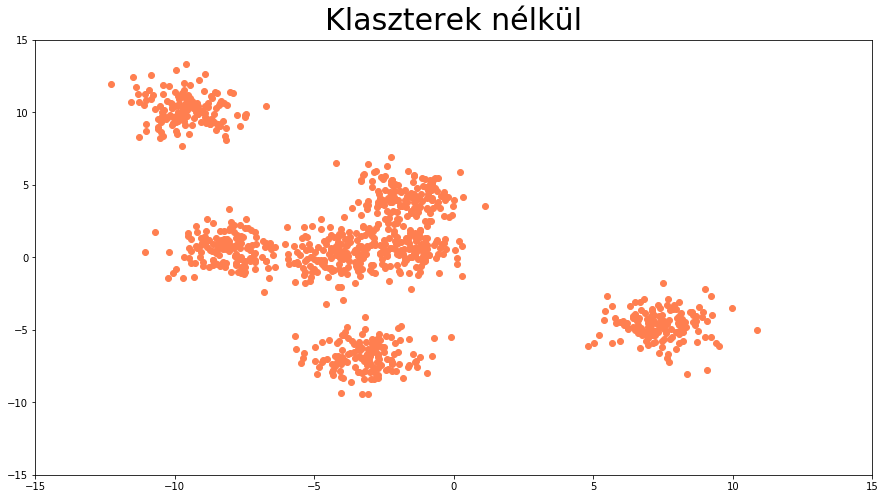

In [3]:
plt.figure(figsize=(15, 8))
plt.title('Klaszterek nélkül', fontdict={'fontsize':30}, pad=10)
plt.axis([-15, 15, -15, 15])
plt.scatter(data.x,data.y, color='coral')
plt.show()

## 1. lépés - klaszterszám megállapítása

In [4]:
X=data.values

Metrikána: euklideszi metrika
Klaszterek távolsága: centroid módszer (jól kezeli a gömbszerű klasztereket)

In [5]:
Z=linkage(X, method='centroid', metric='euclidean', optimal_ordering=True)
Z

array([[5.92000000e+02, 1.00000000e+00, 1.07680351e-02, 2.00000000e+00],
       [9.70000000e+01, 9.80000000e+01, 1.08070246e-02, 2.00000000e+00],
       [5.96000000e+02, 3.60000000e+02, 1.23220206e-02, 2.00000000e+00],
       ...,
       [1.99100000e+03, 1.99500000e+03, 8.21297553e+00, 7.14000000e+02],
       [1.99600000e+03, 1.98800000e+03, 1.19478233e+01, 8.57000000e+02],
       [1.99300000e+03, 1.99700000e+03, 1.36711943e+01, 1.00000000e+03]])

In [6]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [7]:
Z[-20:,2]

array([ 2.23279998,  2.23465315,  2.38593927,  2.39087583,  2.60240169,
        2.66288496,  2.66509741,  2.71142246,  2.82445891,  2.85393501,
        2.89560199,  3.08796884,  3.16456341,  3.4455155 ,  3.52945501,
        3.97904006,  5.69882743,  8.21297553, 11.94782332, 13.67119432])

Az optimális klaszterszám: 5


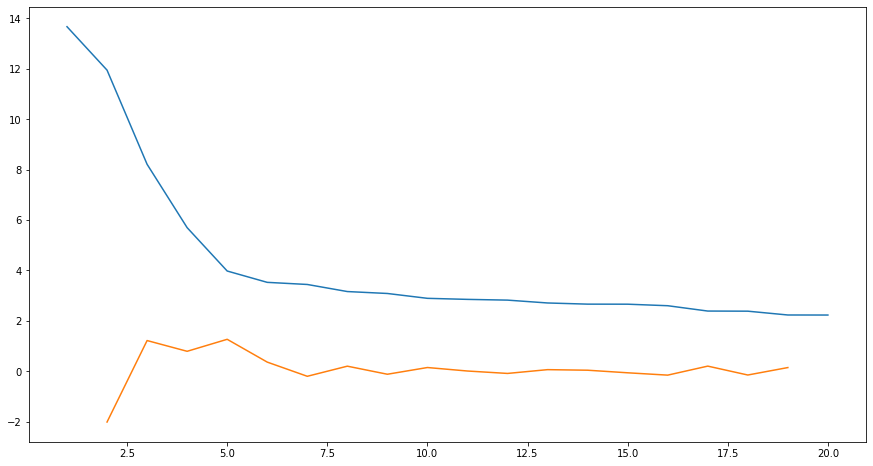

In [8]:
Z=linkage(X, method='centroid', metric='euclidean', optimal_ordering=True)

y=Z[-20:,2]
yr=y[::-1]
idxs=np.arange(1,len(y)+1)

acc = np.diff(y, 2)
acc_r = acc[::-1]
k = acc_r.argmax() + 2

print("Az optimális klaszterszám:", k)

plt.figure(figsize=(15, 8))
plt.plot(idxs,yr)
plt.plot(idxs[:-2] + 1, acc_r)
plt.savefig('konyokpont.png')
plt.show()

## 2-3. lépés - a modell dendogramja

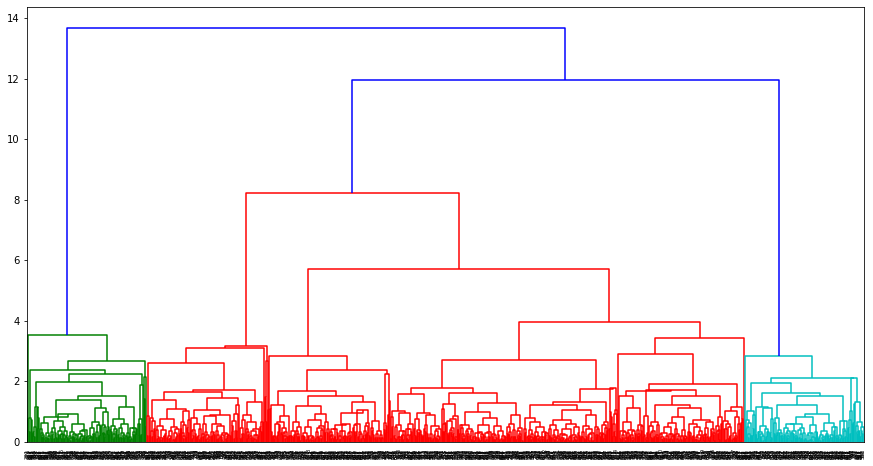

In [9]:
Z = linkage(X, method='centroid', metric='euclidean', optimal_ordering=True)
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(Z)
plt.show()

A dendogramból leolvasva az 5 klaszterhez tartozó maximális távolság ~5.5

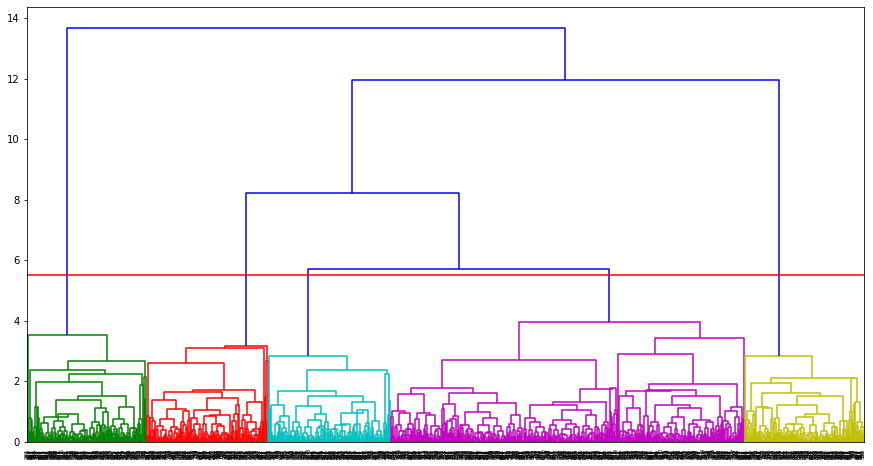

In [10]:
Z = linkage(X, method='centroid', metric='euclidean', optimal_ordering=True)

fig = plt.figure(figsize=(15, 8))
dn = dendrogram(Z, color_threshold=5.5)
plt.axhline(y=5.5, c='r')
plt.savefig('dendogram.png')
plt.show()

## 4.lépés - klaszterezés és ábrázolás

In [11]:
max_d = 5.5
labels = fcluster(Z, max_d, criterion='distance')
set(labels)

{1, 2, 3, 4, 5}

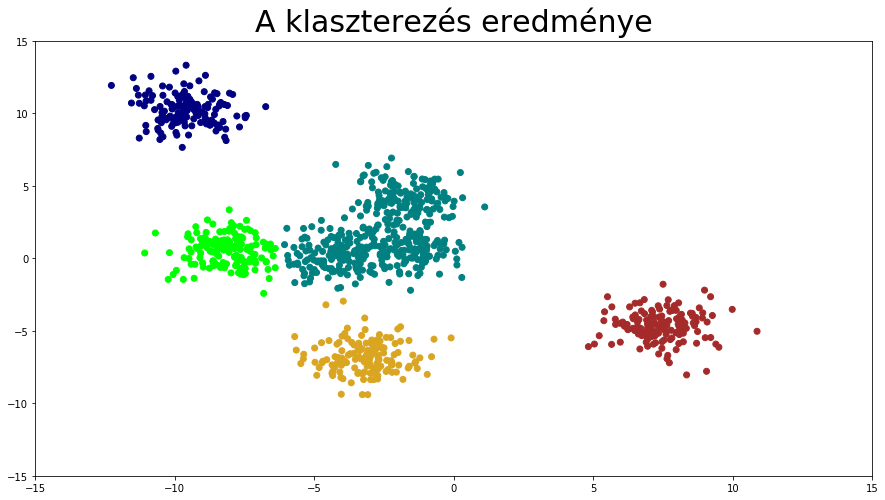

In [12]:
LABEL_COLOR_MAP = {1:'r', 2:'b', 3:'g', 4:'b'}
LABEL_COLOR_MAP = {1:'brown', 2:'goldenrod', 3:'lime' ,4:'teal', 5:'navy' , 6:'magenta'}

label_color = [LABEL_COLOR_MAP[l] for l in labels]



plt.figure(figsize=(15, 8))
plt.title('A klaszterezés eredménye', fontdict={'fontsize':30}, pad=10)
plt.axis([-15, 15, -15, 15])
plt.scatter(data.x, data.y, c=np.array(label_color))
plt.savefig('klaszterek.png')
plt.show()

## SKLEARN

In [13]:
from sklearn.cluster import KMeans
import numpy as np

In [14]:
data = pd.read_csv('data.csv', delimiter=';', header=None, names=['x','y'], dtype={'x':np.float64, 'y':np.float64})
data.head()

,x,y
0,-2.501949,3.634456
1,-1.741856,-0.207114
2,-1.178114,0.949219
3,-3.483569,-0.762401
4,-2.321847,-1.658007


In [15]:
X=[]
for i in range(data.shape[0]):
    X.append([data.x[i], data.y[i]])

In [16]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

In [17]:
labels=kmeans.labels_

In [18]:
kmeans.predict([[0, 0], [12, 3]])

array([0, 3])

In [19]:
kmeans.cluster_centers_

array([[-1.63859582,  0.67958446],
       [-9.5656627 , 10.22746442],
       [-3.1698939 , -6.81215094],
       [ 7.41799128, -4.68044819],
       [-8.11557402,  0.50754616],
       [-1.72093058,  4.21381521],
       [-4.30222708,  0.11277442]])

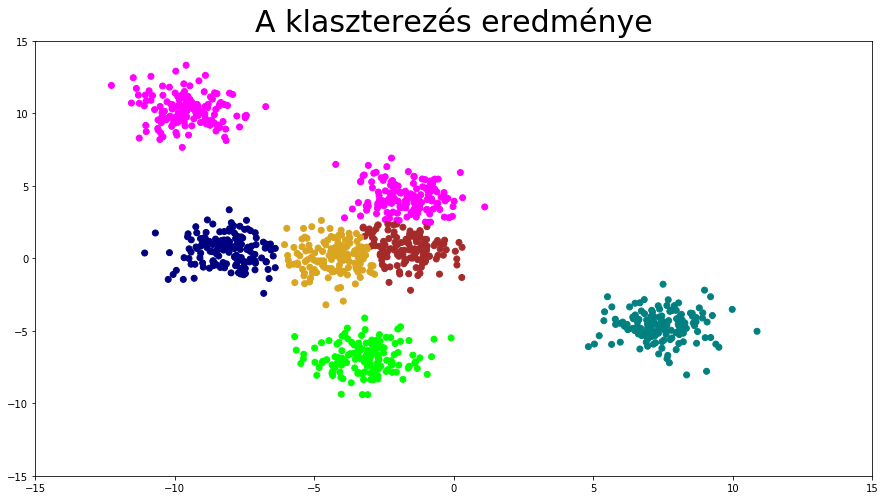

In [20]:
LABEL_COLOR_MAP = {0:'brown', 1:'magenta', 2:'lime' ,3:'teal', 4:'navy' , 5:'magenta', 6:'goldenrod'}

label_color = [LABEL_COLOR_MAP[l] for l in labels]

plt.figure(figsize=(15, 8))
plt.title('A klaszterezés eredménye', fontdict={'fontsize':30}, pad=10)
plt.axis([-15, 15, -15, 15])
plt.scatter(data.x, data.y, c=np.array(label_color))
plt.savefig('klaszterek.png')
plt.show()

In [21]:
from sklearn.cluster import DBSCAN
import numpy as np

In [22]:
data = pd.read_csv('data.csv', delimiter=';', header=None, names=['x','y'], dtype={'x':np.float64, 'y':np.float64})
data.head()

,x,y
0,-2.501949,3.634456
1,-1.741856,-0.207114
2,-1.178114,0.949219
3,-3.483569,-0.762401
4,-2.321847,-1.658007


In [23]:
X=[]
for i in range(data.shape[0]):
    X.append([data.x[i], data.y[i]])

In [24]:
dbscan = DBSCAN(eps=1, min_samples=2).fit(X)

In [25]:
labels=dbscan.labels_

In [26]:
max(labels)

4

In [27]:
min(labels)

-1

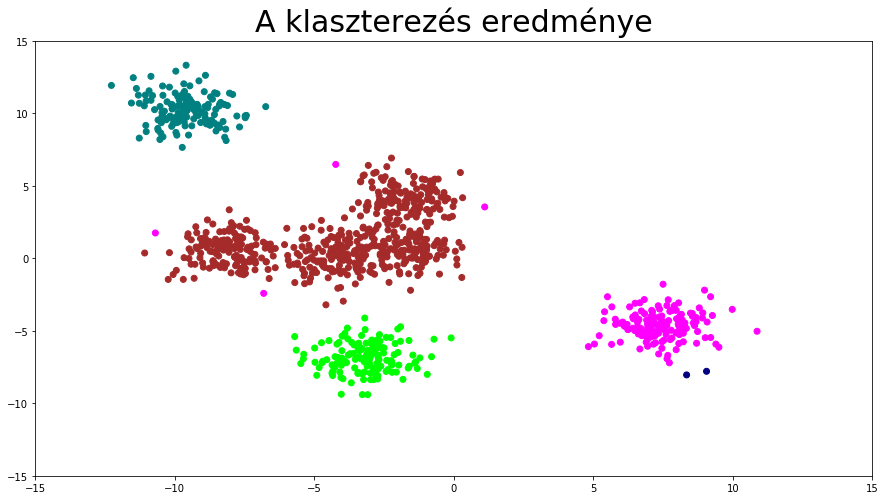

In [28]:
LABEL_COLOR_MAP = {-1:'magenta', 0:'brown', 1:'magenta', 2:'lime' ,3:'teal', 4:'navy' , 5:'magenta', 6:'goldenrod'}

label_color = [LABEL_COLOR_MAP[l] for l in labels]

plt.figure(figsize=(15, 8))
plt.title('A klaszterezés eredménye', fontdict={'fontsize':30}, pad=10)
plt.axis([-15, 15, -15, 15])
plt.scatter(data.x, data.y, c=np.array(label_color))
plt.savefig('klaszterek.png')
plt.show()